In [3]:
#Setup
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from dotenv import load_dotenv
import os
from qiskit_ibm_provider import IBMProvider
from qiskit.visualization import plot_histogram


load_dotenv()
key = os.getenv("IMBQ_KEY")
provider = IBMProvider()

Exercise 3 -> Launch, on a AerSimulator (local), a quantum circuit with 2 qubits, the Hadamard gate on the first one / the controlled-X gate (0, 1)  and 500 shots 

In [4]:
qc = QuantumCircuit(2)

qc.h(0)
#Apply the controlled-X to 'link' the second qubit to the state of the first
qc.cx(0, 1)
qc.measure_all()

print(qc.draw())

        ┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1 


In [5]:
simulator = AerSimulator()
result = simulator.run(qc, shots=500).result()
data = result.get_counts(0)

total = sum(data.values())
data = {key: value / total for key, value in data.items()}

print(data)

{'11': 0.5, '00': 0.5}


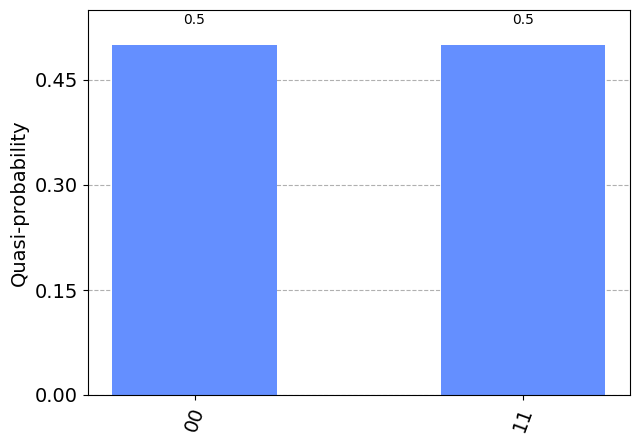

In [6]:
plot_histogram([data])

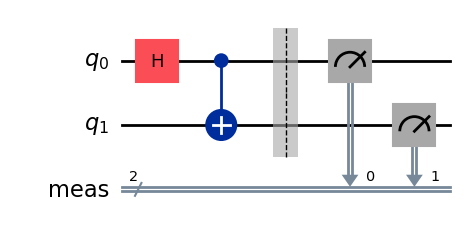

In [7]:
qc.draw('mpl')